# Geodesic Lines and Christoffel Symbols

<a id = 'modules'></a>
In the last jupyter notebook, we have seen how to generate plots of several surfaces with _k3d_. Besides, we did symbolic calculations with the SymPy-module in order to calculate the metric tensor of these manifolds. In this jupyter notebook, it is focused on the geometric aspects of computing geodesics of these surfaces. Actuallt, this is a very fundamental issue, since it occures in a lot of physical fields. Indeed, Hamilton's principle of stationary action is a crucial matter of the most physical theories and it leads directly to geodesics. The theory of general relativity, for instance, describes the movement of objects as geodesics in a four-dimensional spacetime. To understand better, how geodesics change with different geometries, we want to depict some of them and give the possibility to investigate, what is going to happen, when we change the initial values. For this purpose, we are going to use the _gravipy_ -module, which is still rather unpopular, but nevertheless very useful to do symbolic calculations, using the language of tensors. Given a differentiable manifold, we are able to use this module to determine the Christoffel symbols, and with them the geodesics on the manifold and at least the curvature of space itself, which is not a crucial matter in this notebook.


## Contents
1. [Used Modules](#zero) 
2. [First Example - The Cylinder](#first) 
3. [Second Example - The Tours](#second)
4. [Third Example - The Surface of Revolution](#third)
5. [Forth Example - The Sphere](#forth)

<a id = 'zero'></a>
## Used Modules

We are going to use the same modules as we did in the jupyter notebook about metrics, adding the GraviPy-module. Using NumPy and SymPy, it is possible to perform the necessary numerical and symbolic calculations. Besides, the SciPy- and K3D-module is needed to establish our plots. This time, we use ´interact_manual´ instead of ´interact´. Actually, this gives us the possibility to restrict executions on demand only, which is reasonable, because the computer has to perform heavy calculations. Hence, if we want to execute the changes, we have to press the ´Run Interact´-button. In this work, the ´matplotlib´-module is used to make a simple plot.

In [1]:
import gravipy.tensorial as gp
import sympy as sym
import numpy as np
from scipy import spatial
import k3d 
from ipywidgets import widgets, interact_manual, interact
import matplotlib.pyplot as plt

<a id = 'first'></a>
## First Example - The cylinder

In this chapter, we try to find the geodesics for a cylinder. To do this, we first think about the shortest path between two points $\vec{A}$ and $\vec{B}$ on a plane. In this case, we can connect them by a linear function $\vec{r} = \left(\vec{B}-\vec{A}\right)t+\vec{A}$ in parameter form. Consider a piece of paper as a surface, one find the geodesics on it by linear functions, providing the two points, or a point and a vector for the direction. Inorder to build a cylinder, it is possible to do this easily by rolling up the paper and identifying two parallel sides, without changing the inner geometry of the paper. As a consequence, the geodesics on the cylinder have to be linear functions. With starting at one point and walking along a latitude, after some time we will be at the beginning. Hence, an angle $\varphi$ can be used to describe our actual position on the paper in $x$-direction. Additionaly, we can use the cartesian $z$-coordinate, to describe the distance to the ground plane of the cylinder. The parameters of the geodesic will have the linear form:$$ 
\vec{r} = \left(\begin{array}{c}
     \varphi \\
       z \\
	 \end{array}
	 \right) = \left(\begin{array}{c}
      v_{\varphi}t +\varphi_0\\
      v_zt +z_0
	 \end{array}
	 \right)$$
With this information, we can use the polar coordinates to depict our cylinder:
$$\left(\begin{array}{c}
     x \\
     y \\
     z \\
	 \end{array}
	 \right) = \left(\begin{array}{c}
     r\cos(v_{\varphi}t+\varphi_0)\\
     r\sin(v_{\varphi}t+\varphi_0)\\
     v_zt +z_0\\
	 \end{array}
	 \right)
     $$In order to plot our calculated geodesic, we will need the classes for the surfaces that are already created in the [metric notebook](http://localhost:8888/notebooks/Metrics.ipynb).

In [2]:
class Surface2D:
    def __init__(self, p1min, p1max, dim1, p2min, p2max, dim2, constants=[]):
        self.parameters = np.mgrid[p1min:p1max:1j*dim1, p2min:p2max:1j*dim2].T.reshape(-1, 2)
        self.constants = constants
        self.get_points() 
        
    def get_points(self):
        '''set array self.points containing collection of points on the surface

        '''
        raise NotImplementedError
        
    def display(self, wframe=False, opac=1):
        triangulation = spatial.Delaunay(self.parameters)
        plot = k3d.plot()
        points = k3d.mesh(self.points, triangulation.simplices.astype(np.uint32), wireframe=wframe, 
                          opacity=opac, color=0xffc000)
        plot += points
        
        return points

At the beginning, we want to plot a cylinder, using the ´Cylinder´-class from the previous notebook. In the list of constants, we use the first entry as the radius and the second as the height of the tube. Then, an object of the type ´Cylinder´ is created with a radius $r = 1$ and a height of five.

In [3]:
class Cylinder(Surface2D):
    def __init__(self, dim1, dim2, constants=[1, 1]):
        super().__init__(0, 2*np.pi, dim1, 0, constants[1], dim2, constants)
        
    def get_points(self):
        alpha, z = self.parameters.T
        r = self.constants[0]
        self.points = np.array([r*np.cos(alpha),
                                r*np.sin(alpha),
                                z],).T

height = 5
cylinder = Cylinder(60, 60, [1, height])

It is possible to simplify the expression using the slope $m$ of the linear function as follows:
$$ 
\vec{r} = \left(\begin{array}{c}
     \varphi \\
       z \\
	 \end{array}
	 \right) = \left(\begin{array}{c}
      v_{\varphi}t +\varphi_0\\
      v_zt +z_0
	 \end{array}
	 \right) =
     \left(\begin{array}{c}
      v_{\varphi}\\
      v_z
	 \end{array}
	 \right)t + \left(\begin{array}{c}
      \varphi_0\\
      z_0
	 \end{array}
	 \right)\textit{,}$$  We can calculate it with the angle $\alpha$ between the $\varphi$- and the $z$-axis with $m = \tan({\alpha})$ or simply by division $m=\frac{v_z}{v_{varphi}}$. Thus, it follows $v_z = v_{\varphi}\tan({\alpha})$. To compute the values for the velocity, firstly, we have to check if $\alpha = \frac{\pi}{2}$ due to the singularity of $\tan(\alpha)$. Necessarily, to avoid this case, we will use only numerical values between $0$ and $1.57$, which lies slightly below $\frac{\pi}{2}$. As a consequence, we can choose an arbitrary value $v_{\varphi} = 1$ and calculate $v_{z} = v_{\varphi}\tan(\alpha)$. Afterwards, we find the length of this vector, which is $|v|:=\sqrt{v_{\varphi}^2+v_{\varphi}^2tan(\alpha)^2} = \sqrt{1+tan(\alpha)^2} $. Dividing $v_{z}$ and $v_{\varphi}$ by $|v|$, we get a normalized vector. Next, we can adjust the velocity by stretching the vector and multiplying all the velocity values with $w$. Before, we set a time period $t=10$ for the geodesic to evolve and slice it in ´dimt´ parts.      


In [4]:
dimt = 1000
timeperiod = 10
t = np.linspace(0, timeperiod, dimt)

Hereafter, we choose a value for $\alpha = 0$ and $w = 2$, then we calculate the solution for $\varphi$ and $z$ starting at $(\varphi_0,z_0) =\left(\frac{13\pi}{8},0\right)$ for a good visibility. 

In [5]:
alpha = 0
w = 2
phi_0 = 13*np.pi/8
z_0 = 0

v = np.sqrt(1+np.tan(alpha)**2)
v_phi = w/v
v_z = w/v*np.tan(alpha)

phi = v_phi*t + phi_0
z = v_z*t + z_0

We can now map this result on the cylinder and create a geodesic line, as we have seen in the [metric notebook](http://localhost:8888/notebooks/Metrics.ipynb). With ´shader='mesh'´, we get a high precision triangle mesh of segments.

In [6]:
points = np.array([np.cos(phi), 
                   np.sin(phi),
                   z]).T
geodesic = k3d.line(points, color=0x80, width=0.03, shader='mesh')

C:\ProgramData\Anaconda3\lib\site-packages\traittypes\traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  np.dtype(self.dtype).name))


We also want to display the start vector of the geodesic. With $k3d$ it is possible to generate vectors with ´vectors´, i.e. providing information on their origin and direction. To obtain the right velocity vector on the surface, we have to derive the parameterization with respect to $t$, so we get:$$\dot{r}=\frac{\mathrm{d}}{\mathrm{d}t}
\left( \begin{array}{c}
	 \cos(\phi) \\
	 \sin(\phi) \\
	 z \\
	 \end{array}
	 \right) = 
     \left( \begin{array}{c}
	 -\sin(\phi)\dot{\phi} \\
	 \cos(\phi)\dot{\phi} \\
	 \dot{z} \\
	 \end{array}
	 \right) $$

Each vector is assigned two values, that are illustrated with the use of different colors, one for the tip and another for the line of the vector. In this case, the chosen color is blue. 

In [7]:
origins = np.array([np.cos(phi_0), 
                   np.sin(phi_0), 
                   z_0]).T
vector = np.array([-np.sin(phi_0)*v_phi, 
                  np.cos(phi_0)*v_phi,
                  v_z]).T

velocity = k3d.vectors(origins, vector, colors=[0x32a1, 0x32a1])

In the plot, it should be possible to change the geodesic by the angle $\alpha\in[0,\frac{\pi}{2}]$, thus we set it as the parameter for ´updateplot´. Then, we define the same values as before. To get sure that the geodesic stops at the upper end of the cylinder, we look only on the velocity $v_z$ in $z$-direction. If we consider a cylinder with the height ´h´, then the geodesic takes $t = \frac{h}{v_z}$ to reach the upper border of the cylinder if $v_z=0$ we simply set ´timeperiod´ to $5$. Accordingly, we use this as a new time period. Afterwards, we update the vector and the geodesic line. At the end, we plot everything.     

In [8]:
@interact(alpha=widgets.FloatSlider(value=0, min=0, max=np.pi/2, step=0.01, continuous_update=False))
def updateplot(alpha):
    global height
    dimt = 1000
    w = 2
    phi_0 = 13*np.pi/8
    z_0 = 0
    v = np.sqrt(1+np.tan(alpha)**2)
    v_phi = w/v
    v_z = w/v*np.tan(alpha)
    if v_z == 0:
        timeperiod = 5
    else:
        timeperiod = height/v_z
    t = np.linspace(0, timeperiod, dimt)

    velocity.origins = np.array([np.cos(phi_0), 
                                 np.sin(phi_0), 
                                 z_0]).T
    velocity.vectors = np.array([-v_phi*np.sin(phi_0), 
                                 v_phi*np.cos(phi_0), 
                                 v_z]).T
    
    phi = v_phi*t + phi_0
    z = v_z*t + z_0
    points = np.array([np.cos(phi), 
                       np.sin(phi), 
                       z]).T
    geodesic.vertices = points
    

plot_cylinder = k3d.plot()
plot_cylinder += cylinder.display()
plot_cylinder += velocity
plot_cylinder += geodesic
plot_cylinder.display()

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='alpha', max=1.5707963267948…

Output()

Note that the geodesic intersects the latitude in every height with the same angle $\gamma$. This becomes clearer, if you choose an arbitrary latitude and geodesic and then you cut the cylinder along a straight line in $z$-direction. Actually, when you open the cylinder, you obtain again a piece of paper. As a result, every chosen latitude becomes a parallel to the lower line and the geodesic a linear function, which intersects the parallel line always with the same angle $\gamma$. Conversely, this holds not true for every surface of revolution, but we will investigate a more general relationship later.   

<a id = 'second'></a>
## Second Example - The Tours

In the next example, we want to achieve the goal of calculating the geodesic of a torus with the parameterization:
$$ \left(\begin{array}{c}
     x \\
     y \\
     z \\
	 \end{array}
	 \right) = \left(\begin{array}{c}
     (a+b\cos(\theta))\cos(\phi) \\
     (a+b\cos(\theta))\sin(\phi) \\
     b\sin(\theta) \\
	 \end{array}
	 \right)$$
and the angular parameters $\theta\in[0,2\pi]$, $\phi\in[0,2\pi]$, the radii $a$ and $b$.
In the following, there are defined some functions, which will be used to find the geodesic. Moreover, these functions are going to be used later as well. We are going to find our solution numerically. Afterwards, we will plot the surface with its geodesic and examine what will happen, when we start the geodesic in different directions.
In order to calculate the geodesics on a manifold, in general, we have to solve the geodesic differential [equation ](https://en.wikipedia.org/wiki/Geodesic), i.e. a differential equation system of second order. To solve this, we will transform it into a system of four differential equations of first order:$$
\frac{\mathrm{d}^2x^{k}}{\mathrm{d}t^2} = -\Gamma^{k}_{ij}\frac{\mathrm{d}x^i}{\mathrm{d}t}\frac{\mathrm{d}x^j}{\mathrm{d}t}$$
substituting with $u^i = \mathrm{d}x^i/\mathrm{d}t$. Consequently, for a two-dimensional surface, we get the following differential equation: $$
\left( \begin{array}{c}
	 \dot{x}^1 \\
	 \dot{x}^2 \\
	 \dot{u}^1 \\
     \dot{u}^2\\
	 \end{array}
	 \right)=\left( \begin{array}{c}
	 u^1\\
	 u^2\\
	 -\sum_{i,j = 1}^2 \Gamma^1_{ij}u^iu^j\\
     -\sum_{i,j = 1}^2 \Gamma^2_{ij}u^iu^j\\
	 \end{array}
	 \right)
     =
     \left( \begin{array}{c}
	 u^1\\
	 u^2\\
	 -\Gamma^1_{11}(u^1)^2 -2\Gamma^1_{12}u^1u^2 - \Gamma^1_{22}(u^2)^2\\
     -\Gamma^2_{11}(u^1)^2 -2\Gamma^2_{12}u^1u^2 - \Gamma^2_{22}(u^2)^2\\
	 \end{array}
	 \right),
$$
giving the start position and start velocity in this form:$$w_0 = \left(\begin{array}{c}
     x_0^1 \\
	 x_0^2 \\
     v_0^1 \\
     v_0^2\\
	 \end{array}
	 \right)
$$
Before we can implement this differential equation, we have to determine the Christoffel symbols. At first, we have to define symbols with SymPy, in our case, we are going to use $\phi$, $\theta$ and the radii $a$ and $b$.

In [9]:
phi, theta, a, b = sym.symbols("phi theta a b ")

Then, we determine the derivations with respect to $\theta$ and $\phi$ of ´vtorus´. We create the matrix of $g_\mathrm{Torus}$, using the inner product. Afterwards, we want to plot the torus with $a=2$ and $b=1$. Therefore, these values are substituted in the metric tensor $g_\mathrm{Torus}$.

In [10]:
phi, theta, a, b = sym.symbols("phi theta a b ")
    
vtorus = sym.Matrix([(a + b*sym.cos(theta))*sym.cos(phi),
                     (a + b*sym.cos(theta))*sym.sin(phi),
                     b*sym.sin(theta)])
    
dphi = sym.simplify(sym.diff(vtorus, phi))
dtheta = sym.simplify(sym.diff(vtorus, theta))

g_Torus = sym.Matrix([[dphi.dot(dphi), dphi.dot(dtheta)],
                      [dtheta.dot(dphi), dtheta.dot(dtheta)]])
g_Torus = sym.simplify(g_Torus)
g_Torus = g_Torus.subs(a, 2).subs(b, 1)

Later, we define our coordinates $\theta$ and $\phi$ with GraviPy, using ´Coordinates´. With ´MetricTensor´, we transform our matrix into a tensorial object of GraviPy. 

In [11]:
coords = gp.Coordinates('chi', [theta, phi])
g = gp.MetricTensor('g', coords, g_Torus)

If you want to see all the elements of the matrix, you have to give ´All´ of GraviPy to the arguments of the metric tensor for all indices.

In [12]:
g(gp.All, gp.All)

Matrix([
[(cos(theta) + 2)**2, 0],
[                  0, 1]])

Now, we have all necessary elements to calculate the Christoffel symbols ´Ga´ with the function ´Christoffel´ from GraviPyy. After doing so, we display it again, inserting ´All´ for every three indices. For the first index, we have to set a minus, to get the contravariant result.

In [13]:
Ga = gp.Christoffel('Ga', g)
Ga(-gp.All, gp.All, gp.All)

Matrix([[Matrix([
[-sin(theta)/(cos(theta) + 2), 0],
[                           0, 0]]), Matrix([
[0, 0],
[0, 0]])]])

Now, we are going to implement a function, which represents the right side of our differential equation, giving, in general, $t$ for the time and an $n$-dimensional vector $x$. For this purpose, we also need the Christoffel symbols and the coordinates. Then, we prepare the resulting vector ´result´, creating a SymPy-matrix with the coordinates $\phi$ = ´coords(-1)´ and $z$ = ´coords(-2)´. In addition, we define a NumPy-vector filled with $1$ only, in which we will save the solution in floats. We have to use negative indices to obtain the contravariant form of our coordinates, positive ones for the covariant form. The entries which later have to be filled with the Christoffel symbols, are set to zero at the beginning of the function. Then, we are going to use two loops to calculate the sum. Contrary to custom, the GraviPy-module starts counting with $1$, in consequence we have to add $1$ to the indices. At the end of the inner loop, we are adding the result to the according entry of the ´result´-vector. Thereafter, we can evaluate the result in a loop with ´subs´, giving the values of $x$. In the same loop, we have to control whether the calculated value is "not a number" with ´isnan´ or infinity with ´isinf´ of NumPy. If one of these is the case, we can evaluate the value with limits using ´limit´ of ´sympy´ for every coordinate. Afterwards, we arrange the results in a NumPy array and return it.     

In [14]:
def DE(t, x, coords, G):
    u, v = sym.symbols("u v")
    helpingcoords = sym.Matrix([u, v])
    dim = 2
    result = sym.Matrix([u, v, 0., 0.])
    result_num = np.ones(4)
    for k in range(dim):
        s = 0
        for i in range(dim):
            for j in range(dim):
                s = s - G(-(k + 1), (i + 1), (j + 1))*helpingcoords[i]*helpingcoords[j]
        result[k+2] = s
    for k in range(2*dim): 
        result_num[k] = float((((result[k].subs(coords(-1), x[0])).subs(coords(-2), x[1])).subs(u, x[2])).subs(v, x[3]))
        if np.isnan(result_num[k]) or np.isinf(result_num[k]):
            result_num[k] = float(sym.limit(sym.limit(sym.limit(sym.limit(result[k], u, x[2]), v, x[3]),
                                  coords(-1), x[0]), coords(-2), x[1]))
    return result_num


In general, finding the solution of the differential equation is not trivial. Hence, we have to approximate the solution. The [Runge-Kutta-method](https://en.wikipedia.org/wiki/Runge–Kutta_methods) is a very easy way to solve initial value problems of our form. Using this method, it is necessary to implement a function, giving the right side of our equation, which we called ´DE´. Hereafter, we have to set a starting vector ´w0´. Afterwards, the coordinates and the Christoffel symbols have to be specified, to use our differential equation function above. With ´timeperiod´, it is possible to set the duration of the numerical solution. With $h$ we can set the length of one timestep. Then we set the start value ´w0´ for ´w´ and the starting time is $0$. We want to create a matrix with the same number of columns as dimensions of our vector and for every time instance one line. Therefore, we have to determine the dimension of the starting vector with the ´length´-function. Then, we establish the matrix ´solution´ filled with zeros. Afterwards, we insert the starting vector in the first line and start the approximation algorithm of Runge-Kutta. Hereafter, the function returns the resulting matrix.

In [15]:
def RungeKutta(func, w0, coords, G, timeperiod, h=0.2):
    deltat = h
    steps = int(timeperiod/h)
    w = w0
    t = 0
    solution = np.zeros((steps + 1, len(w)))
    solution[0][:] = w
    for n in range(steps):
        k_1 = deltat*func(t, w, coords, G)
        k_2 = deltat*func(t + deltat/2, w + k_1/2, coords, G)
        k_3 = deltat*func(t + deltat/2, w + k_2/2, coords, G)
        k_4 = deltat*func(t + deltat, w + k_3, coords, G)
        w = w + (k_1 + 2*k_2 + 2*k_3 + k_4)/6
        t = t + deltat
        solution[n + 1][:] = w
    return solution      

We want to plot a torus, so we also need the ´Torus´-class. In the list of constants, we use the first entry as the radius $a$ and the second as the radius $b$ of the tours and set them $a = 2$ and $b=1$, by default. Then, we create an object of the type ´Torus´.   

In [16]:
class Torus(Surface2D):
    def __init__(self, dim1, dim2, constants=[2, 1]):
        super().__init__(0, 2*np.pi, dim1, 0, 2*np.pi, dim2, constants)
        
    def get_points(self):
        a = self.constants[0]
        b = self.constants[1]
        theta, phi = self.parameters.T
        self.points = np.array([(a + b*np.cos(theta))*np.cos(phi),
                                (a + b*np.cos(theta))*np.sin(phi),
                                b*np.sin(theta)], dtype=np.float32).T
torus = Torus(60, 60)

At this point, the geodesic can be calculated, giving a start vector, as shown below. Notice that the chosen values are selected in view of good visibility of the start point. Then, we determine the solution for the parameters of the line with the ´RungeKutta´ method, in which we use all functions and classes, we have defined before. To access the solution, all the results for the $\theta$ -value in ´theta´ and analogously for $\phi$ are saved. 

In [17]:
startvector = startvector = np.array([0, 13/8*np.pi, 0, 1])
t = 10
parameters = RungeKutta(DE, startvector, coords, Ga, t, h=0.1)

theta = parameters[:, 0]
phi = parameters[:, 1]

Afterwards, it is possible to generate the line, in the same manner, as we did in the metric-notebook. Note that we have to set values for the radii $a$ and $b$ as told before.

In [18]:
a = 2
b = 1
points = np.array([(a + b*np.cos(theta))*np.cos(phi),
                   (a + b*np.cos(theta))*np.sin(phi),
                   b*np.sin(theta)]).T
geodesic = k3d.line(points, color=0x80, width=0.03, shader='mesh')

To complete the plot, we want to display the velocity vector and the geodesic on the torus together, as you have seen before. 
$$
\frac{\mathrm{d}}{\mathrm{d}t}\left(\begin{array}{c}
     (a+b\cos(\theta))\cos(\phi) \\
     (a+b\cos(\theta))\sin(\phi) \\
     b\sin(\theta) \\
	 \end{array}
	 \right) = \left(\begin{array}{c}
     -b\sin(\theta)\cos(\phi)\dot{\theta}- (a+b\cos(\theta))\sin(\phi)\dot{\phi} \\
     -b\sin(\theta)\sin(\phi)\dot{\theta} +(a+b\cos(\theta))\cos(\phi)\dot{\phi} \\
     b\cos(\theta)\dot{\theta} \\
	 \end{array}
	 \right)$$ 

In [19]:
origins = np.array([(a + b*np.cos(startvector[0]))*np.cos(startvector[1]), 
                    (a + b*np.cos(startvector[0]))*np.sin(startvector[1]), 
                    b*np.sin(startvector[0])]).T

vector = np.array([-b*np.sin(startvector[0])*np.cos(startvector[1])*startvector[2]
                   - (a + b*np.cos(startvector[0]))*np.sin(startvector[1])*startvector[3],
                   - b*np.sin(startvector[0])*np.sin(startvector[1])*startvector[2]
                   + (a + b*np.cos(startvector[0]))*np.cos(startvector[1])*startvector[3],
                   b*np.cos(startvector[0])*startvector[2]]).T
velocity = k3d.vectors(origins, vector, colors=[0x32a1, 0x32a1])

<a id = 'alpha'></a>
In the graphic, we want to be able to change the direction, in which the geodesic starts and the angle $\theta$, so it is necessary to create two sliders, one for the angle $\alpha\in[0,\frac{\pi}{2}]$ , with $\tan(\alpha) = \frac{v_\theta}{v_{\phi}}$ and one for $\theta$, to be able to start geodesics from the inside of the central hole. As a consequence,
the _updateplot_ -function takes two argument for the angle $\alpha$ and $\theta$. We set $\phi = \frac{13\pi}{8}$, in order to place the start point in the center. Then, we follow the same steps, as we did for the cylinder. Hereafter, we can update the attributes of our start vector, using the parameterization and its calculated derivative for ´origins´ and ´vectors´. Following, we repeat the same steps as in the [metric notebook](http://localhost:8888/notebooks/Metrics.ipynb) to change the values for the line. 

After this function, the plot is created and the objects are added to the plot.  


In [20]:
@interact_manual(alpha=widgets.FloatSlider(min=0, max=np.pi/2, step=0.01),
                 theta_0=widgets.FloatSlider(min=0, max=np.pi))
def updateplot(alpha, theta_0):
    a = 2
    b = 1    
    v_para = 1 
    phi_0 = 13/8*np.pi

    norm_const = np.sqrt(1 + np.tan(alpha)**2)
    v_phi = 1/norm_const
    v_theta = np.tan(alpha)/norm_const
        
    v_phi = v_para*v_phi
    v_theta = v_para*v_theta
  
    velocity.origins = np.array([(a+b*np.cos(theta_0))*np.cos(phi_0),
                                 (a+b*np.cos(theta_0))*np.sin(phi_0),
                                 b*np.sin(theta_0)]).T
    
    velocity.vectors = np.array([-b*np.sin(theta_0)*np.cos(phi_0)*v_theta - (a + b*np.cos(theta_0))*np.sin(phi_0)*v_phi,
                                 -b*np.sin(theta_0)*np.sin(phi_0)*v_theta + (a + b*np.cos(theta_0))*np.cos(phi_0)*v_phi,
                                  b*np.cos(theta_0)*v_theta]).T
    
    startvector = np.array([theta_0, phi_0, v_theta, v_phi])
    t = 10
    parameters = RungeKutta(DE, startvector, coords, Ga, t, h=0.05)
    theta = parameters[:, 0]
    phi = parameters[:, 1]
    points = np.array([(a + b*np.cos(theta))*np.cos(phi),
                       (a + b*np.cos(theta))*np.sin(phi),
                       b*np.sin(theta)]).T
    
    geodesic.vertices = points
    
    
torus = Torus(60, 60)
plot = k3d.plot()
plot += torus.display()
plot += velocity
plot += geodesic
plot.display()

interactive(children=(FloatSlider(value=0.0, description='alpha', max=1.5707963267948966, step=0.01), FloatSli…

Output()

In further examinations, you could explore the effects of changed start values on the geodesic. It is also possible to find closed geodesic curves. For which tuples of values, you obtain a geodesic cycle? 

Actually, we can approximate geodesics with this method, but we cannot be sure, whether the solution is good or not. In order to know better the behavior of the ´RungeKutta´ method, we can compare the solution for the geodesics on the cylinder with the approximation. For this purpose, we calculate both solutions and compare the results graphically. To do so, we first compute the solution exactly:      

In [21]:
dimt = 101
timeperiod = 10
t = np.linspace(0, timeperiod, dimt)
alpha = 0.5

w = 2
phi_0 = 13*np.pi/8
z_0 = 0

v = np.sqrt(1+np.tan(alpha)**2)
v_phi = w/v
v_z = w/v*np.tan(alpha)

phi_exact = v_phi*t + phi_0
z_exact = v_z*t + z_0

Then, we define the symbols $\varphi$, $z$ and $r$ for the cylinder. We found in the [metric notebook](http://localhost:8888/notebooks/Metrics.ipynb) the metric tensor of the cylinder with $g_{ij} = \mathrm{diag}(r^2, 1)$. Following, we calculate again the Christoffel symbols. Afterwards, we set the same start conditions as for the exact solution. Therefore, we have 101 time steps, $\frac{10}{h}+1$, thus the same as for the exact computation. 

In [22]:
phi, z, r = sym.symbols('phi z r')
coords = gp.Coordinates('chi', [phi, z])
metric = sym.diag(r**2, 1).subs(r, 1)
g = gp.MetricTensor('g', coords, metric)
Ga = gp.Christoffel('Ga', g)

startvector = np.array([phi_0, z_0, v_phi, v_z])
timeperiod = 10

parameters = RungeKutta(DE, startvector, coords, Ga, timeperiod, h=0.1)
phi_approx = parameters[:, 0]
z_approx = parameters[:, 1]

If we want to compare the error in $\varphi$- and in $z$-direction, we can calculate the difference: $$ 
\vec{res} = \left(\begin{array}{c}
     \varphi_\mathrm{exact} - \varphi_\mathrm{approx} \\
       z_\mathrm{exact} - z_\mathrm{approx} \\
	 \end{array}
	 \right)$$
After that, we compute $err = |\vec{res}|$ and plot it with the time t, using matplotlib: 

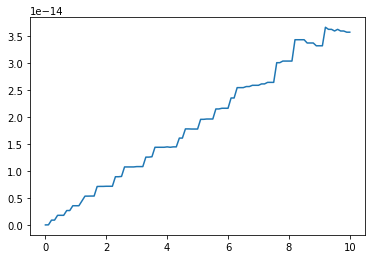

In [23]:
err = np.sqrt((phi_exact - phi_approx)**2 + (z_exact - z_approx)**2)
plt.plot(t, err)
plt.show()

This graphic shows, that the approximation with Runge-Kutta is performing well on the linear function, the maximal error occurs at the end point with $err_\mathrm{max}\sim10^{-14}$. Nevertheless, we have to be careful for other solutions, because the algorithm could be sensible for curvature.    

<a id = 'third'></a>
## Third Example - The Surface of Revolution

In the following example, we try to do the same for a surface of revolution. Therefore, we have a look on the parameterization with the angular parameter $\phi\in[0,2\pi]$ and $z\in[0,6\pi]$ for the height: $$\left( \begin{array}{c}
	 x \\
	 y \\
	 z \\
	 \end{array}
	 \right)=\left( \begin{array}{c}
	 f(z)\cos(\phi) \\
     f(z)\sin(\phi) \\
	 z \\
	 \end{array}
	 \right)\text{, with }f(z)=\cos(z)+2$$
     
Notice that the form of the parameterization is very similar to the cylinder, we exchange the radius with a function $f$, that depends on the $z$-value. As a result, a modulation of the cylinder will be achived. Afterwards, we can plot the surface with the corresponding class.    


In [24]:
class SurfaceOfRevolution(Surface2D):
    def __init__(self, dim1, dim2):
        super().__init__(0, 6*np.pi, dim1, 0, 2*np.pi, dim2)
        
    def get_points(self):
        z, phi = self.parameters.T
        f = np.cos(z) + 2
        self.points = np.array([f*np.cos(phi),
                                f*np.sin(phi), 
                                z]).T
surfaceOfRevolution = SurfaceOfRevolution(60, 60)
surfaceOfRevolution.display()

Output()

Here, we want to make some investigations on the behavior of the geodesics on this surface of revolution. But before the metric of the surface has to be found. After that, we follow the same procedure as we did several times before and print the metric at the end.

In [25]:
phi, z = sym.symbols("phi z")
    
vrev = sym.Matrix([(sym.cos(z) + 2)*sym.cos(phi),
                   (sym.cos(z) + 2)*sym.sin(phi), 
                   z])
    
dphi = sym.simplify(sym.diff(vrev, phi))
dz = sym.simplify(sym.diff(vrev, z))

g_rev = sym.Matrix([[dphi.dot(dphi), dphi.dot(dz)],
                    [dz.dot(dphi), dz.dot(dz)]])
g_rev = sym.simplify(g_rev)
g_rev

Matrix([
[(cos(z) + 2)**2,             0],
[              0, sin(z)**2 + 1]])

Hence, we change the type of our metric to a tensorial object and determine the Chritoffel symbols. Afterwards, we have a look on them.    

In [26]:
coords = gp.Coordinates('chi', [phi, z])
g = gp.MetricTensor('g', coords, g_rev)
Ga = gp.Christoffel('Ga', g)
Ga(-gp.All, gp.All, gp.All)

Matrix([[Matrix([
[                   0, -sin(z)/(cos(z) + 2)],
[-sin(z)/(cos(z) + 2),                    0]]), Matrix([
[(cos(z) + 2)*sin(z)/(sin(z)**2 + 1),                            0],
[                                  0, sin(2*z)/(2*(sin(z)**2 + 1))]])]])

Investigating its properties, we can see that the Christoffel symbols do not have any singularities, since $|\cos(z)|\leq1$ and $\sin^2(z)\geq0$. Notice that beside the geodesic we create another line, that we call ´belt´, to have a latitude. We are going to need it later, to make some investigations on the properties of the geodesic. To do so, we set a constant height ´h´ and evaluate the parameterization in this variable with a variation of the angular parameter $\varphi$. For the last component of the vector, we have to multiply ´h´ by a vector with only ones because of reasons of dimensionality.    

In [27]:
startvector = np.array([0, 13/8*np.pi, 0, 1])
t = 10
h = 2*np.pi
parameters = RungeKutta(DE, startvector, coords, Ga, t, h=0.1)

phi = parameters[:, 0]
z = parameters[:, 1]

points = np.array([(np.cos(z) + 2)*np.cos(phi),
                  (np.cos(z) + 2)*np.sin(phi), 
                  z]).T

pointsBelt = np.array([(np.cos(h) + 2)*np.cos(phi),
                       (np.cos(h) + 2)*np.sin(phi), 
                       h*np.ones(len(phi))]).T

geodesic = k3d.line(points, color=0x80, width=0.03, shader='mesh')
belt = k3d.line(pointsBelt, color=0x32a1, width=0.03, shader='mesh')

Again, there should be a start vector, indicating the direction in which the geodesic starts. To compute this vector, the derivative of the parameterization with respect to the time $t$ has to be found: $$
\frac{\mathrm{d}}{\mathrm{d}t}\left( \begin{array}{c}
	 (\cos(z)+2)\cos(\phi) \\
     (\cos(z)+2)\sin(\phi) \\
	 z \\
	 \end{array}
	 \right)=
    \left( \begin{array}{c}
	 -(\cos(z)+2)\sin(\phi)\dot{\phi}-\sin(z)\cos(\phi)\dot{z} \\
     (\cos(z)+2)\cos(\phi)\dot{\phi}-\sin(z)\sin(\phi)\dot{z} \\
	 \dot{z} \\
	 \end{array}
	 \right)$$
Afterwards, the arrays are created, providing it with all the necessary information for the position of the vector and the direction, using the derivative. 


In [28]:
origins = np.array([(np.cos(startvector[1]) + 2)*np.cos(startvector[0]),
                    (np.cos(startvector[1]) + 2)*np.sin(startvector[0]), 
                    startvector[1]]).T
vector = np.array([-(np.cos(startvector[1]) + 2)*np.sin(startvector[0])*startvector[2] - 
                  np.sin(startvector[1])*np.cos(startvector[0])*startvector[3],
                  (np.cos(startvector[1]) + 2)*np.cos(startvector[0])*startvector[2] - 
                  np.sin(startvector[1])*np.sin(startvector[0])*startvector[3],
                  startvector[3]]).T
velocity = k3d.vectors(origins, vector, colors=[0x32a1, 0x32a1])

Now, we want to make some special investigations about the geodesic. To do so, it is useful to have a latitude to compare it to the geodesic. We want to be able to change the height of the latitude in a continuous and fast way. Since the computation of the geodesic will take a while, we split those two parts into two functions. Actually, the first function will be the same as we used several times before. The ´updateplot´-function takes an angle $\alpha$ and calculates the geodesic. This time we change the ´parameters´-variable to a global variable, since we will need the information about the current geodesic for the second function. On the other hand, the ´updateplot_h´-function takes the parameter ´h´ for the height of the latitude. 

For the beginning, we start the function using the global variable ´parameters´ which contains all information about the current geodesic. Afterwards, the function creates an angle ´belt_angle´ which is required to depict the latitude, since it has a constant height ´h´ and varies in the $\phi$ component. Then, we define the variables ´phi´, ´z´, ´v_phi´ and ´v_z´ of the geodesic. Hereafter, we use a loop to find the $z$-value of the geodesic which has a distance, smaller than $0.1$ to ´h´. If we can such a value of the geodesic, the function computes the ´beltpoints´ and the tangential vector ´v_belt´ of the latitude for this $z$-value and updates ´belt´. Furthermore, it calculates the tangential vector ´v_geodesic´ of the geodesic. In the example of the cylinder, we have seen that the geodesic intersects every latitude with the same angle $\gamma$, so we want to see whether this is also true for this surface of revolution. With the inner product, the angle between these two lines can be computed as follows:
$$ \cos(\gamma) = \frac{v_\mathrm{geodesic}^Tv_\mathrm{belt}}{\sqrt{|v_\mathrm{geodesic}|^2|v_\mathrm{belt}|^2}}$$ 
We are quantifying this value and save it then in ´cosgamma´. After executing the program with a geodesic that is going upwards without return. Obviously, the angle $\gamma$ is changing; it is becoming bigger at the bulges and smaller at the waists of the surface. The angle $\gamma\in[0,\pi]$ is growing, as soon as the radius is becoming bigger, but $\cos(\gamma)$ is decreasing. Consequently, we can guess that maybe $\cos(\gamma)\propto\frac{1}{r}$. In the simplest case, we can suppose that $r\cos(\gamma) = const.$ To try that out, we determine this value and print the radius $r$, the angle $\gamma$ and $r\cos(\gamma)$ and round it. Afterwards, the function can be closed with ´return´. If this case does not occur, we simply depict the ´belt´ in the height ´h´. 
After these two functions, we display the surface, the geodesic, the start vector and the belt with K3D.     


In [29]:
@interact_manual(alpha=widgets.FloatSlider(min=0, max=np.pi/2, step=0.01))
def updateplot(alpha):
    global parameters
    v_para = 1 
    phi_0 = 13/8*np.pi
    z_0 = 2.5*np.pi
    
    norm_const = np.sqrt(1 + np.tan(alpha)**2)
    v_phi = -1/norm_const
    v_z = np.tan(alpha)/norm_const
        
    v_phi = v_para*v_phi
    v_z = v_para*v_z
    
    velocity.origins = np.array([(np.cos(z_0) + 2)*np.cos(phi_0),
                                 (np.cos(z_0) + 2)*np.sin(phi_0), 
                                 z_0]).T
    velocity.vectors = np.array([-(np.cos(z_0) + 2)*np.sin(phi_0)*v_phi - np.sin(z_0)*np.cos(phi_0)*v_z,
                                 (np.cos(z_0) + 2)*np.cos(phi_0)*v_phi - np.sin(z_0)*np.sin(phi_0)*v_z,
                                 v_z]).T  
    startvector = np.array([phi_0, z_0, v_phi, v_z])
    parameters = RungeKutta(DE, startvector, coords, Ga, t, h=0.05)
    phi = parameters[:, 0]
    z = parameters[:, 1]
    points = np.array([(np.cos(z) + 2)*np.cos(phi),
                       (np.cos(z) + 2)*np.sin(phi), 
                       z]).T

    geodesic.vertices = points


@interact(h=widgets.FloatSlider(min=0, max=6*np.pi))
def updateplot_h(h):
    global parameters
    belt_angle = np.linspace(0, 2*np.pi, 50)
    phi = parameters[:, 0]
    z = parameters[:, 1]
    v_phi = parameters[:, 2]
    v_z = parameters[:, 3]
    
    for n in range(len(z)):
        if abs(h - z[n]) < 1e-1:
            pointsBelt = np.array([(np.cos(z[n]) + 2)*np.cos(belt_angle),
                                   (np.cos(z[n]) + 2)*np.sin(belt_angle), 
                                   h*np.ones(len(belt_angle))]).T
            v_belt = np.array([-(np.cos(z[n]) + 2)*np.sin(phi[n])*v_phi[n],
                               (np.cos(z[n]) + 2)*np.cos(phi[n])*v_phi[n],
                               0]).T
            belt.vertices = pointsBelt
            
            v_geodesic = np.array([-(np.cos(z[n]) + 2)*np.sin(phi[n])*v_phi[n] - 
                                   np.sin(z[n])*np.cos(phi[n])*v_z[n],
                                   (np.cos(z[n]) + 2)*np.cos(phi[n])*v_phi[n] - 
                                   np.sin(z[n])*np.sin(phi[n])*v_z[n],
                                   v_z[n]]).T
            
            cosgamma = v_geodesic.dot(v_belt)/np.sqrt(v_geodesic.dot(v_geodesic)*v_belt.dot(v_belt))
            r = np.cos(z[n]) + 2
            print("r=", round(r, 3))
            print("\u03B3 = ", round(180*np.arccos(cosgamma)/np.pi, 2), "°")
            print("rcos(\u03B3) = ", round(r*cosgamma, 4))
            return
        
    pointsBelt = np.array([(np.cos(h) + 2)*np.cos(belt_angle),
                           (np.cos(h) + 2)*np.sin(belt_angle), 
                           h*np.ones(len(belt_angle))]).T
    belt.vertices = pointsBelt
            
    
surfaceOfRevolution = SurfaceOfRevolution(60, 60)
plot = k3d.plot()
plot += surfaceOfRevolution.display()
plot += velocity
plot += belt
plot += geodesic
plot.display()

interactive(children=(FloatSlider(value=0.0, description='alpha', max=1.5707963267948966, step=0.01), Button(d…

interactive(children=(FloatSlider(value=0.0, description='h', max=18.84955592153876), Output()), _dom_classes=…

Output()

In this plot, there are several things to observe. For the beginning, the product satisfies $r\cos(\gamma) = const.$ for the angle $\gamma$ between the geodesic and every latitude. This is no coincidence, since [Clairaut's relation](https://en.wikipedia.org/wiki/Clairaut%27s_relation) shows clearly, that the product of the radius $r$ and the cosine of the angle $\gamma$ between every latitude and the geodesic is constant. This follows from conservation of angular momentum due to the rotation symmetry. 

Moreover, if we consider the case of no angular momentum, the angle $\varphi$ of the geodesic remains constant. This can be approximated by $\alpha = 1.57$. Be aware that there is still a small angular momentum, because $\pi\neq1.57$. With growing angular momentum, the velocity in $\varphi$-direction is increasing. Finally, with $\alpha\approx1.18$ the geodesic has too much angular momentum to cross the waist of the surface, so it returns. The waist has an angular momentum, which corresponds to $r_\mathrm{min} = 1$ and $\gamma = 0°$. Hence, a geodesic with $ r\cos(\gamma) = r_\mathrm{min}\cos(0°) = 1$ spirals forever towards the waist. For this surface, we can summarize the following cases:

1. if $r\cos(\gamma) = 0$, the geodesic is a meridian. 
2. if $0\leq r\cos(\gamma)<1$, the geodesic can cross the waists. 
3. if $r\cos(\gamma) = 1$, the geodesic has the same angular momentum as the waist. Hence, it will spiral towards the waist.
4. if $r\cos(\gamma) >1$, the angular momentum of the geodesic is too big and it cannot cross the waist. Thus, it has to remain between two of them. 


<a id = 'forth'></a>
### Forth Example - The Sphere

As last example, we want to find the geodesics for the unit sphere as well. Therefore, we use the sphere class implemented in the [metric notebook](http://localhost:8888/notebooks/Metrics.ipynb). Notice that the sphere is also a special case of a surface of revolution. If you rotate a semicircle, you will get the sphere. Ergo, it is a special case of the previous example with an arbitrary axis of rotation.

In [30]:
class Sphere(Surface2D):
    def __init__(self, dim1, dim2, constants=[1]):
        super().__init__(0, np.pi, dim1, 0, 2*np.pi, dim2, constants)
        
    def get_points(self):
        r = self.constants[0]
        theta, phi = self.parameters.T
        self.points = np.array([r*np.sin(theta)*np.cos(phi),
                                r*np.sin(theta)*np.sin(phi),
                                r*np.cos(theta)]).T

In order to calculate the geodesic, we need the Christoffel symbols again. Because of that, we define our angular parameters $\phi$ and $\theta$ as symbols, with the ´Coordinates´-function of GraviPy. Afterwards, we use another time the ´diag´-function, to obtain the metric. Since the GraviPy-module requires a tensor, we determine the metric with the ´metric´ and the ´coords´, using ´MetricTensor´.       

In [31]:
phi, theta = sym.symbols('phi theta')
coords = gp.Coordinates('chi', [theta, phi])
metric = sym.diag(1, sym.sin(theta)**2)
g = gp.MetricTensor('g', coords, metric)

<a id = 'chsph'></a>
Now, using the metric tensor, the Christoffel symbols can be computed. With ´All´ we can display all the components of the matrix.

In [32]:
Ga = gp.Christoffel('Ga', g)
Ga(-gp.All, gp.All, gp.All)

Matrix([[Matrix([
[0,               0],
[0, -sin(2*theta)/2]]), Matrix([
[                             0, sin(2*theta)/(2*sin(theta)**2)],
[sin(2*theta)/(2*sin(theta)**2),                              0]])]])

Finally, we have all necessary elements to calculate and plot the geodesic. In order to use the ´RungeKutta´-method, we need to define a starting vector: $$ w_0 = \left(\begin{array}{c}
     \theta_0 \\
	 \phi_0\\
     v_{\theta 0} \\
     v_{\phi 0}\\
	 \end{array}
	 \right)$$
Notice that we cannot set $\theta = 0$, due to the singularity in the Christoffel symbols. As a consequence, we start at $\left(\frac{\pi}{2},\frac{13\pi}{8}\right)$, because it is going to be at the center of the plot and the velocity only in $\phi$-direction.

In [33]:
startvector = np.array([np.pi/2, 13/8*np.pi, 0, 1])

<a id = 'para'></a>
Afterwards, we use ´RungeKutta´ to calculate the discrete points of the geodesic for the parameters using the time ´t = 10´.

In [34]:
t = 10
parameters = RungeKutta(DE, startvector, coords, Ga, t, h=0.1)

The returned matrix contains also the velocity at any point of the line, but for the line we need only the values of $\theta$ and $\phi$.

In [35]:
theta = parameters[:, 0]
phi = parameters[:, 1]

Hereafter, we map the parameters on the sphere and create the line ´geodesic´. To compare this line later to the equator, another line with $\theta=\frac{\pi}{2}$, which is called ´equator´, has to be created.

In [36]:
points = np.array([np.sin(theta)*np.cos(phi),
                   np.sin(theta)*np.sin(phi),
                   np.cos(theta)]).T
geodesic = k3d.line(points, color=0x80, width=0.03, shader='mesh')

equator_points = np.array([np.sin(np.pi/2)*np.cos(phi),
                          np.sin(np.pi/2)*np.sin(phi),
                          np.zeros(len(phi))]).T

equator = k3d.line(equator_points, color=0xc800ff, width=0.01, shader='mesh')

We display again the starting velocity of the geodesic with a vector, which we place on the sphere for $\theta =\frac{\pi}{2}$ and $\phi = \frac{13\pi}{8}$. But previously, the derivative of the parameterization with respect to $t$ has to be computed:
$$\dot{r}=\frac{\mathrm{d}}{\mathrm{d}t}
\left( \begin{array}{c}
	 \sin(\theta)\cos(\phi) \\
	 \sin(\theta)\sin(\phi) \\
	 \cos(\theta) \\
	 \end{array}
	 \right) = 
     \left( \begin{array}{c}
	 \cos(\theta)\cos(\phi)v_{\theta} - \sin(\theta)\sin(\phi)v_{\phi}\\
	 \cos(\theta)\sin(\phi)v_{\theta} + \sin(\theta)\cos(\phi)v_{\phi}\\
	 -\sin(\theta)v_{\theta}\\
	 \end{array}
	 \right) $$
         

In [37]:
origins = np.array([np.sin(startvector[0])*np.cos(startvector[1]),
                    np.sin(startvector[0])*np.sin(startvector[1]),
                    np.cos(startvector[0])]).T

vector = np.array([np.cos(startvector[0])*np.cos(startvector[1])*startvector[2] 
                   - np.sin(startvector[0])*np.sin(startvector[1])*startvector[3], 
                   np.cos(startvector[0])*np.sin(startvector[1])*startvector[2] 
                   + np.sin(startvector[0])*np.cos(startvector[1])*startvector[3],
                   -np.sin(startvector[0])*startvector[2]]).T
velocity = k3d.vectors(origins, vector, colors=[0x32a1, 0x32a1])

With the widgets, we set the values for the starting vector. Therefore, we choose two fix values $\phi_0 = \frac{13\pi}{8}$ and $\theta_0 = \frac{\pi}{2}$ for the position, where we start our geodesic. We have to pay attention to the [singularities](#chsph) of the Christoffel symbols for $\theta = 0$ and $\theta = \pi$, so we cannot choose any value. However, for $\phi_0$ there are no singularities. Hence, we choose a value, that places the start point at a central position of our plot. Due to the spherical symmetry of the sphere, we can get every possible geodesic by choosing a fix point on the sphere and rotating the coordinate system. This time, we will change the $\theta_0$-value of the geodesic, starting with $\theta = \frac{\pi}{2
}$. We calculate the velocities in the same manner as before. This time, we set a variable ´alpha´ which is set to zero, so we obtain the equator. After this function, we initialize the plot with creating a sphere, adding the velocity vector, the geodesic line and the equator to it. Be aware that the update of the plot can take some time, due to the vast number of calculations that has to be done by the computer.                  


In [38]:
@interact_manual(theta_0=widgets.FloatSlider(value=np.pi/2, min=0.1, max=np.pi/2, step=0.01))
def updateplot(theta_0):
    alpha = 0
    v_para = 1 
    phi_0 = 13/8*np.pi
    
    norm_const = np.sqrt(1 + np.tan(alpha)**2)
    v_phi = 1/norm_const
    v_theta = -np.tan(alpha)/norm_const
        
    v_phi = v_para*v_phi
    v_theta = v_para*v_theta
    
    velocity.origins = np.array([np.sin(theta_0)*np.cos(phi_0),
                                 np.sin(theta_0)*np.sin(phi_0),
                                 np.cos(theta_0)]).T
    
    velocity.vectors = np.array([np.cos(theta_0)*np.cos(phi_0)*v_theta - np.sin(theta_0)*np.sin(phi_0)*v_phi, 
                                 np.cos(theta_0)*np.sin(phi_0)*v_theta + np.sin(theta_0)*np.cos(phi_0)*v_phi,
                                 -np.sin(theta_0)*v_theta]).T
    
    startvector = np.array([theta_0,
                            phi_0,
                            v_theta,
                            v_phi])
    t = 10
    parameters = RungeKutta(DE, startvector, coords, Ga, t, h=0.05)
    theta = parameters[:, 0]
    phi = parameters[:, 1]
    points = np.array([np.sin(theta)*np.cos(phi),
                       np.sin(theta)*np.sin(phi),
                       np.cos(theta)]).T
    
    geodesic.vertices = points
    
    
sphere = Sphere(60, 60)
plot = k3d.plot()
plot += sphere.display()
plot += velocity
plot += geodesic
plot += equator
plot.display()

interactive(children=(FloatSlider(value=1.5707963267948966, description='theta_0', max=1.5707963267948966, min…

Output()

One could expect that with pushing the start point towards the pole, the geodesics are going to be circles with a decreasing radius, in a plane parallel to the equator plane. But this is not true. As you can observe, the geodesic remains a [Great circle](https://en.wikipedia.org/wiki/Great_circle) for arbitrary values. In fact, with a decreasing value of $\theta$, the geodesic is only changing its angle towards the equator plane. These geodesics have also a practical application. If you consider the earth as a sphere, these circles are the routs a plane would take to get from one airport to another.       